In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,NaN,3.0,2.0,7.0,8.0,2.0,9.0,11.0,7.0,NaN,1.0,8.0,5.0,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,NaN,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,NaN
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,NaN,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,NaN,8.0,3.0,8.0,0.0,8.0,NaN
4,6.0,7.0,NaN,5.0,4.0,7.0,6.0,3.0,NaN,10.0,7.0,9.0,3.0,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,NaN,NaN,10.0,7.0,8.0,12.0,10.0,9.0,2.0,9.0,2.0,6.0,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,2.0,10.0,12.0,6.0,8.0,1.0,9.0,6.0,8.0,NaN
19997,4.0,8.0,NaN,6.0,4.0,7.0,8.0,NaN,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.0,NaN
19998,4.0,11.0,4.0,NaN,3.0,0.0,NaN,4.0,6.0,1.0,0.0,7.0,0.0,8.0,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	2750
float64		column 2	2500
float64		column 3	2000
float64		column 4	1750
float64		column 5	2000
float64		column 6	2500
float64		column 7	1750
float64		column 8	2250
float64		column 9	2000
float64		column 10	1250
float64		column 11	1000
float64		column 12	1750
float64		column 13	2250
float64		column 14	2250
float64		column 15	2000
float64		column 16	2000
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,17250.000000,17500.000000,18000.000000,18250.000000,18000.000000,17500.000000,18250.000000,17750.000000,18000.000000,18750.000000,19000.000000,18250.000000,17750.000000,17750.000000,18000.000000,18000.000000,0.0
mean,4.007188,7.053486,5.117611,5.382027,3.489111,6.912514,7.491562,4.614423,5.174389,8.277387,6.448158,7.926137,3.006873,8.336000,3.681111,7.811667,NaN
std,1.825717,3.197733,1.950838,2.225081,2.135681,1.926815,2.246657,2.616265,2.321817,2.459424,2.589672,1.998087,2.241305,1.496067,2.502819,1.548331,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,7.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,8.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

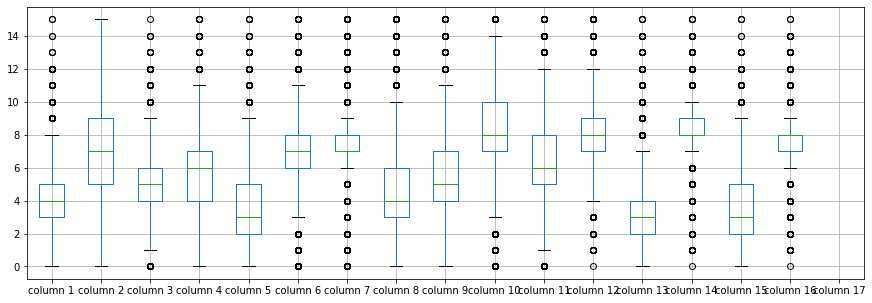

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.007188
column 2     7.053486
column 3     5.117611
column 4     5.382027
column 5     3.489111
column 6     6.912514
column 7     7.491562
column 8     4.614423
column 9     5.174389
column 10    8.277387
column 11    6.448158
column 12    7.926137
column 13    3.006873
column 14    8.336000
column 15    3.681111
column 16    7.811667
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.732149,0.837670,0.647957,0.599531,-0.029154,0.038260,0.016352,0.043602,0.143202,0.032155,-0.042727,0.462894,0.088318,0.252321,-0.098684,NaN
column 2,0.732149,1.000000,0.644338,0.808999,0.536116,0.038110,-0.030903,-0.016527,0.090104,0.149744,-0.044553,-0.006201,0.258939,0.004175,0.217497,-0.043046,NaN
column 3,0.837670,0.644338,1.000000,0.640129,0.752118,0.060671,0.019034,-0.095820,0.051835,0.110390,0.011051,-0.041491,0.530297,0.042747,0.243249,-0.105478,NaN
column 4,0.647957,0.808999,0.640129,1.000000,0.632928,0.047047,-0.022485,0.081962,0.056147,0.011481,-0.011012,0.029277,0.247670,0.024895,0.290623,-0.020179,NaN
column 5,0.599531,0.536116,0.752118,0.632928,1.000000,0.131892,-0.029498,-0.003754,-0.056278,-0.069127,-0.066304,-0.033876,0.601938,0.018445,0.473847,-0.057886,NaN
column 6,-0.029154,0.038110,0.060671,0.047047,0.131892,1.000000,-0.361985,-0.048652,-0.113134,0.076176,-0.336362,-0.029151,0.130683,-0.235435,0.120285,0.242006,NaN
column 7,0.038260,-0.030903,0.019034,-0.022485,-0.029498,-0.361985,1.000000,-0.111476,-0.047216,0.172147,0.585210,-0.260959,-0.035847,0.536341,-0.077659,-0.200529,NaN
column 8,0.016352,-0.016527,-0.095820,0.081962,-0.003754,-0.048652,-0.111476,1.000000,-0.174467,-0.307795,0.039873,0.072038,0.136157,-0.077681,0.011531,0.164732,NaN
column 9,0.043602,0.090104,0.051835,0.056147,-0.056278,-0.113134,-0.047216,-0.174467,1.000000,0.129199,-0.058616,0.100913,-0.365087,-0.053980,0.267254,-0.059957,NaN
column 10,0.143202,0.149744,0.110390,0.011481,-0.069127,0.076176,0.172147,-0.307795,0.129199,1.000000,0.054382,-0.103741,-0.167435,0.035359,-0.089205,-0.109501,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+6,17+6+6,17+6+6+6,17+6+6,17+6,17], vae_layer = False, seed = 60)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 69.47488133850098
Epoch: 1 , loss: 45.48401796417237
Epoch: 2 , loss: 42.388676043701174
Epoch: 3 , loss: 41.077104118347165
Epoch: 4 , loss: 40.166587948608395
Epoch: 5 , loss: 39.54656043701172
Epoch: 6 , loss: 39.1768819229126
Epoch: 7 , loss: 38.79015865478516
Epoch: 8 , loss: 38.58591776733398
Epoch: 9 , loss: 38.4164201385498
Epoch: 10 , loss: 38.23247850189209
Epoch: 11 , loss: 37.98548931427002
Epoch: 12 , loss: 37.822803677368164
Epoch: 13 , loss: 37.79924134063721
Epoch: 14 , loss: 37.649112628173825
Epoch: 15 , loss: 37.53525864257813
Epoch: 16 , loss: 37.41634871673584
Epoch: 17 , loss: 37.34533031005859
Epoch: 18 , loss: 37.392097395324704
Epoch: 19 , loss: 37.2633808013916
Epoch: 20 , loss: 37.080222053527834
Epoch: 21 , loss: 36.987406431579586
Epoch: 22 , loss: 37.03226131744385
Epoch: 23 , loss: 36.944041868591306
Epoch: 24 , loss: 36.848449766540526
Epoch: 25 , loss: 36.99026265258789

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    5.476322
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17   -0.001498
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.0,0.0,-0.381436,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-1.293361,0.0,0.000000,0.0,0.0,NaN
1,0.0,0.0,0.000000,0.000000,0.00000,3.760728,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,NaN
2,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,-0.516471,0.0,0.0,NaN
3,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,-1.726252,0.000000,0.0,0.000000,0.0,0.0,NaN
4,0.0,0.0,-2.869697,0.000000,0.00000,0.000000,0.000000,0.000000,-2.094967,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.000000,0.000000,1.42264,4.410890,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,NaN
19996,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,NaN
19997,0.0,0.0,0.922887,0.000000,0.00000,0.000000,0.000000,-2.681095,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,NaN
19998,0.0,0.0,0.000000,-2.902521,0.00000,0.000000,4.920888,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

552.3604296671157

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.14793454436125814

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      5.251036
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17     0.000334
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,3.618564,3.000000,2.00000,7.000000,8.000000,2.000000,9.000000,11.0,7.000000,5.706639,1.0,8.000000,5.0,6.0,-0.004715
1,4.0,7.0,5.000000,5.000000,5.00000,8.760728,9.000000,6.000000,4.000000,8.0,7.000000,9.000000,2.0,9.000000,7.0,10.0,0.000636
2,7.0,10.0,8.000000,7.000000,4.00000,8.000000,8.000000,5.000000,10.000000,11.0,2.000000,8.000000,2.0,4.483529,5.0,10.0,0.000314
3,4.0,9.0,5.000000,7.000000,4.00000,7.000000,7.000000,13.000000,1.000000,7.0,4.273748,8.000000,3.0,8.000000,0.0,8.0,0.001387
4,6.0,7.0,5.130303,5.000000,4.00000,7.000000,6.000000,3.000000,4.905033,10.0,7.000000,9.000000,3.0,8.000000,3.0,7.0,-0.003019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.000000,8.000000,4.42264,8.410890,10.000000,7.000000,8.000000,12.0,10.000000,9.000000,2.0,9.000000,2.0,6.0,0.002014
19996,4.0,7.0,6.000000,5.000000,3.00000,7.000000,8.000000,2.000000,10.000000,12.0,6.000000,8.000000,1.0,9.000000,6.0,8.0,-0.002049
19997,4.0,8.0,4.922887,6.000000,4.00000,7.000000,8.000000,4.318905,4.000000,10.0,7.000000,6.000000,3.0,9.000000,3.0,7.0,-0.001782
19998,4.0,11.0,4.000000,5.097479,3.00000,0.000000,6.920888,4.000000,6.000000,1.0,0.000000,7.000000,0.0,8.000000,0.0,8.0,0.001719


In [21]:
imputations[-1].to_excel("Letter_NE_10(imp).xlsx", index=False, header=False)